In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

In [81]:
#Create data frame for Students with pandas
df = pd.read_csv("Cataract_Data_1.2.csv")

In [82]:
#5 number summery
def five_number(*argv):
    arg_list = []
    for arg in argv:
        arg_list.append(arg)
    return pd.DataFrame(df[arg_list].describe())

#frequency table
def frequency_table(argv):
    print(pd.DataFrame(df[argv].value_counts(sort=False,)))


#compares two varables for both positive and negative
def two_bars(*argv):
    arg_list = []
    for arg in argv:
        arg_list.append(arg)
    
    groupby_positive_negative = df.groupby('positive_negative')[arg_list].mean()
    groupby_positive_negative.plot.bar()
    
#scatterplot("x label","y label","varable 1","varable 2")
def scatterplot(x_axis,y_axis,arg1,arg2):
    temp_df = pd.DataFrame({"pos/neg": df["positive_negative"],"x": df[arg1],"y": df[arg2]})

    _label = []
    _label1 = []

    for i in range(temp_df["x"].size):
        if temp_df["pos/neg"][i] == 1:
            _label.append("yes")
            _label1.append("red")
        else:
            _label.append("no")
            _label1.append("green")

    temp_df['label'] = _label
    temp_df['label_num'] = _label1

    
    # plot groupby results on the same canvas 
    fig, ax = plt.subplots(figsize=(8,6))

    #u, temp_df["label_num"] = np.unique(temp_df["label"], return_inverse=True)
    sc = ax.scatter(x = "x", y = "y", c = "label_num", data=temp_df)
    #ax.legend(sc.legend_elements()[0], u, title="Label")
    #ax.legend([line1, line2], ['label1', 'label2'])
    plt.grid(True,alpha=.3)
    plt.title("Relationship Between " + x_axis + " and " + y_axis + ":")
    plt.xlabel(str(x_axis))
    plt.ylabel(str(y_axis))
    
    plt.show()
    print("Red = Positive || Green = Negative") 

#pos_neg_histogram("title","collumn","amount of bins","amount of bins")
def pos_neg_histogram(_title,arg1,_bins1,_bins2):
    df1 = pd.DataFrame(df[df['positive_negative']== 1])
    df2 = pd.DataFrame(df[df['positive_negative']== 0])
    data1 = df1[arg1]
    data2 = df2[arg1]

    plt.figure(figsize=(8,6))
    plt.hist(data1, bins=_bins1, alpha=0.5, label="Positive")#, edgecolor='black', linewidth=1
    plt.hist(data2, bins=_bins2, alpha=0.5, label="Negative")#, edgecolor='black', linewidth=1
    plt.xlabel(_title, size=14)
    plt.ylabel("Count", size=14)
    plt.grid(True,alpha=.3)
    
    plt.title('Postive / Negative Histogram of ' + _title + ':')
    plt.legend(loc='upper right')
    plt.show()

def boxWhisker(*var):
    argList = []
    for arg in var:
        argList.append(arg)
    data = df[argList]
    fig = plt.figure(figsize =(10, 7))

    #creating plot
    plt.boxplot(data, notch=True)
    title = ""
    for arg in var:
        title = title + arg + ", "
    actualTitle = title[:len(title)-2]
    plt.title("Comparative Box Plot of "+ actualTitle)
    
    #show plot
    plt.show()

def boxWhiskerPosNeg1Var(var):
    #separating the pos and neg
    pos = df[df["positive_negative"] > 0]
    neg = df[df["positive_negative"] < 1]
    argListPos = pos[var]
    argListNeg = neg[var]
    
    #putting them into one array
    data = []
    data.append(argListPos)
    data.append(argListNeg)
    fig = plt.figure(figsize =(10, 7))
    
    #creating plot
    plt.boxplot(data,)
    
    plt.title("Comparative Box Plot of "+ var + " Among the Positive and Negative Group")
    
    #show plot
    plt.show()

# """def two_bars(argv):
#     arg_list = [argv]
#     groupby_var = df.groupby(['first_letter',"positive_negative"])[arg_list].mean()
#     print(groupby_var)
#     df1 = groupby_var[groupby_var['positive_negative']=='positive']
#     df2 = groupby_var[groupby_var['positive_negative']=='negative']
#     print(df1)
#     groupby_positive_negative = groupby_var.groupby('first_letter').mean()
#     print(groupby_positive_negative)
#     groupby_positive_negative.plot.bar()

# two_bars("solv_area")"""

In [83]:
# """df1 = pd.DataFrame(df[df['positive_negative']== 1])
# df2 = pd.DataFrame(df[df['positive_negative']== 0])
# print(df1)
# print(df2)


# speed = df1["solv_area"]
# lifespan = df2["solv_area"]
# _df = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan})
# ax = df.plot.bar(rot=0)
# """

In [84]:
df

,index_name,ogAA_letter,positionAA_num,mutAA_letter,positive_negative,iso_point,ogAA_char,mutAA_char,deldel_G1,solv_area,deldel_G2,deldel_G3,evo_age,pdel
0,A171T,A,171,T,1,6.76,n,l,-0.47,85.3,-0.550085,-0.005249,324,0.50
1,D140N,D,140,N,1,7.15,-,l,-0.96,59.0,-1.864259,-0.180476,750,0.74
2,D109H,D,109,H,1,7.18,-,"H,+",-0.42,65.2,-0.661944,-0.509662,750,0.74
3,D109A,D,109,A,1,7.15,-,n,-0.11,65.2,-0.550471,-0.670734,750,0.74
4,P20S,P,20,S,1,6.76,P,l,-0.78,35.9,-0.703610,-0.456211,750,0.74
5,P20R,P,20,R,1,7.15,P,+,-0.68,35.9,-0.447788,0.006020,750,0.74
6,R11C,R,11,C,1,6.50,+,"C,I",-0.66,67.7,-0.751450,0.009686,750,0.74
7,R11H,R,11,H,1,6.55,+,"H,+",-0.96,67.7,-1.160834,-0.253809,750,0.74
8,R12C,R,12,C,1,6.50,+,"C,I",-0.69,59.4,-0.918708,-0.062331,750,0.74
9,R56W,R,56,W,1,6.50,+,n,-0.18,97.8,-1.002371,0.353859,456,0.57


In [85]:
## Numerical summaries
frequency_table("positive_negative")
frequency_table("ogAA_letter")
frequency_table("positionAA_num")
frequency_table("mutAA_letter")
five_number("iso_point")

   positive_negative
0                 26
1                 14
   ogAA_letter
F            1
K            1
T            4
R            8
D            3
P            4
L            3
H            1
S            5
E            1
A            1
V            3
Q            1
M            1
I            3
     positionAA_num
107               1
131               1
68                1
69                1
70                1
120               1
11                2
140               1
12                1
145               1
19                1
20                2
150               1
151               1
152               1
153               2
157               1
98                1
88                1
39                1
40                1
41                2
170               1
171               1
162               1
109               2
142               1
49                1
114               1
51                1
132               1
119               1
56                1
124              

,iso_point
count,40.000000
mean,6.749000
std,0.169778
min,6.500000
25%,6.760000
50%,6.760000
75%,6.760000
max,7.180000


In [86]:
five_number("deldel_G1")

,deldel_G1
count,40.000000
mean,-0.710500
std,0.499759
min,-2.360000
25%,-0.977500
50%,-0.665000
75%,-0.320000
max,-0.050000


In [87]:
five_number("deldel_G2")

,deldel_G2
count,40.000000
mean,-0.823967
std,0.403883
min,-1.864259
25%,-1.009999
50%,-0.753484
75%,-0.567266
max,0.087355


In [88]:
five_number("deldel_G3")

,deldel_G3
count,40.000000
mean,-0.254557
std,0.394826
min,-1.670055
25%,-0.420744
50%,-0.243555
75%,-0.012531
max,0.478284


In [89]:
five_number("evo_age")

,evo_age
count,40.000000
mean,453.850000
std,253.777568
min,6.000000
25%,298.000000
50%,408.000000
75%,750.000000
max,1036.000000


In [90]:
five_number("pdel")

,pdel
count,40.000000
mean,0.536500
std,0.198062
min,0.020000
25%,0.500000
50%,0.570000
75%,0.740000
max,0.850000


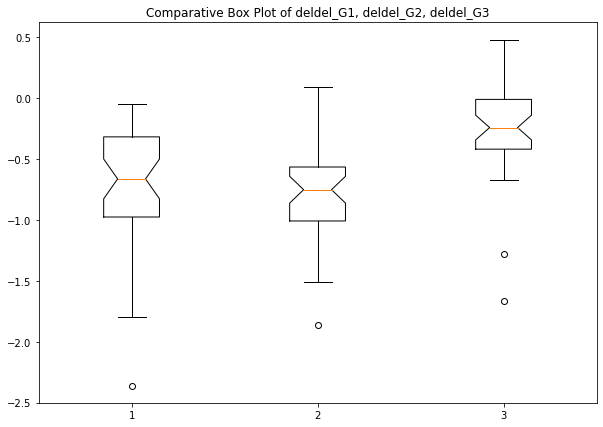

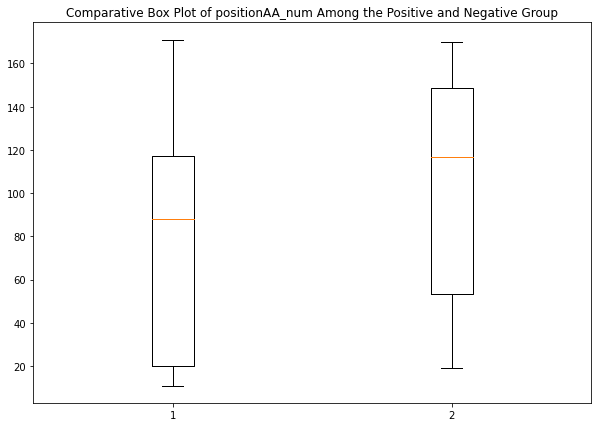

In [91]:
##Graphical summaries

boxWhiskerPosNeg1Var("positionAA_num")

In [92]:
##Fundamental numerical and graphically summary for two or more variables

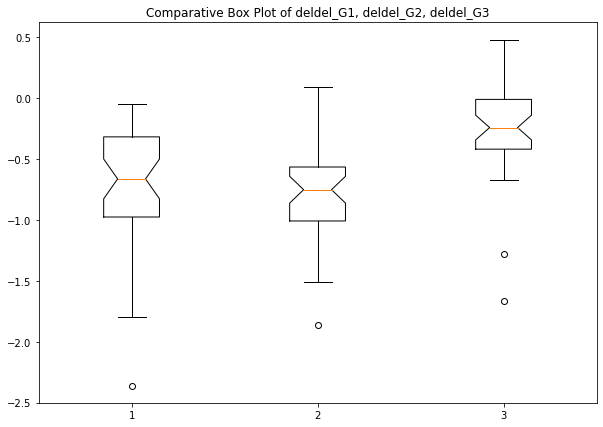

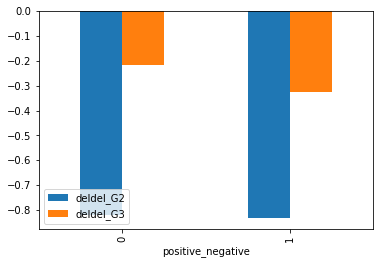

In [93]:
boxWhisker("deldel_G1", "deldel_G2", "deldel_G3")
two_bars("deldel_G2","deldel_G3")

In [7]:
five_number("TEMP3")

,TEMP3
count,40.000000
mean,-0.254557
std,0.394826
min,-1.670055
25%,-0.420744
50%,-0.243555
75%,-0.012531
max,0.478283


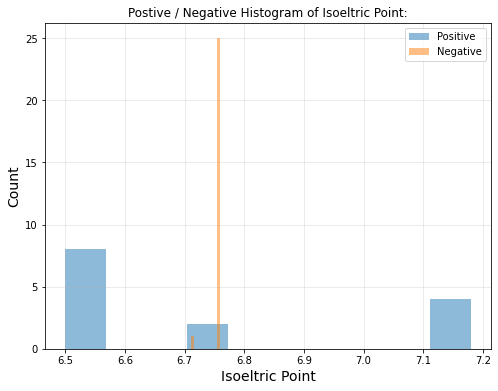

KeyError: 'TEMP4'

In [115]:
pos_neg_histogram("Isoeltric Point","iso_point",10,10)
pos_neg_histogram("Eveolutionary Time","TEMP4",10,10)

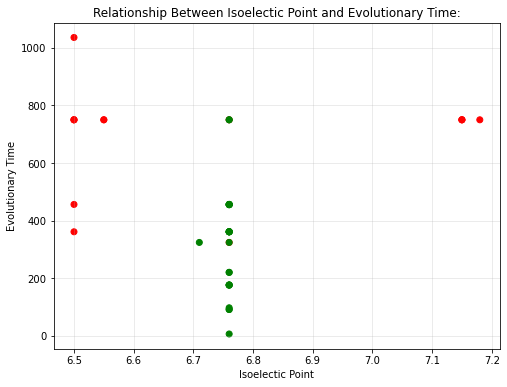

Red = Positive || Green = Negative


In [52]:
scatterplot("Isoelectic Point","Evolutionary Time","iso_point","TEMP4")

In [77]:
pos_neg_histogram("first_letter",10,10)
pos_neg_histogram("last_letter",10,10)
pos_neg_histogram("first_letter",10,10)
pos_neg_histogram("iso_point",5,5)
pos_neg_histogram("orig_AA",10,10)
pos_neg_histogram("mut_AA",10,10)
pos_neg_histogram("TEMP1",10,10)
pos_neg_histogram("solv_area",10,10)
pos_neg_histogram("TEMP2",10,10)
pos_neg_histogram("TEMP3",10,10)

TypeError: pos_neg_histogram() missing 1 required positional argument: '_bins2'